<h2><a href="https://leetcode.com/problems/random-pick-with-weight">528. Random Pick with Weight</a></h2><h3>Medium</h3><hr><p>You are given a <strong>0-indexed</strong> array of positive integers <code>w</code> where <code>w[i]</code> describes the <strong>weight</strong> of the <code>i<sup>th</sup></code> index.</p>

<p>You need to implement the function <code>pickIndex()</code>, which <strong>randomly</strong> picks an index in the range <code>[0, w.length - 1]</code> (<strong>inclusive</strong>) and returns it. The <strong>probability</strong> of picking an index <code>i</code> is <code>w[i] / sum(w)</code>.</p>

<ul>
	<li>For example, if <code>w = [1, 3]</code>, the probability of picking index <code>0</code> is <code>1 / (1 + 3) = 0.25</code> (i.e., <code>25%</code>), and the probability of picking index <code>1</code> is <code>3 / (1 + 3) = 0.75</code> (i.e., <code>75%</code>).</li>
</ul>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input</strong>
[&quot;Solution&quot;,&quot;pickIndex&quot;]
[[[1]],[]]
<strong>Output</strong>
[null,0]

<strong>Explanation</strong>
Solution solution = new Solution([1]);
solution.pickIndex(); // return 0. The only option is to return 0 since there is only one element in w.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input</strong>
[&quot;Solution&quot;,&quot;pickIndex&quot;,&quot;pickIndex&quot;,&quot;pickIndex&quot;,&quot;pickIndex&quot;,&quot;pickIndex&quot;]
[[[1,3]],[],[],[],[],[]]
<strong>Output</strong>
[null,1,1,1,1,0]

<strong>Explanation</strong>
Solution solution = new Solution([1, 3]);
solution.pickIndex(); // return 1. It is returning the second element (index = 1) that has a probability of 3/4.
solution.pickIndex(); // return 1
solution.pickIndex(); // return 1
solution.pickIndex(); // return 1
solution.pickIndex(); // return 0. It is returning the first element (index = 0) that has a probability of 1/4.

Since this is a randomization problem, multiple answers are allowed.
All of the following outputs can be considered correct:
[null,1,1,1,1,0]
[null,1,1,1,1,1]
[null,1,1,1,0,0]
[null,1,1,1,0,1]
[null,1,0,1,0,0]
......
and so on.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= w.length &lt;= 10<sup>4</sup></code></li>
	<li><code>1 &lt;= w[i] &lt;= 10<sup>5</sup></code></li>
	<li><code>pickIndex</code> will be called at most <code>10<sup>4</sup></code> times.</li>
</ul>


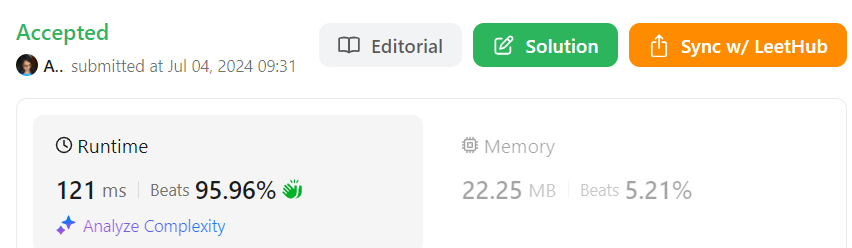

In [2]:
from typing import List
class Solution:

    def __init__(self, w: List[int]):
        self.w = w
        sum_w = sum(w)
        self.n  = len(w)

        self.pdf = [i/sum_w  for i in w]

        # Get the CDF
        self.cdf = [0]* self.n
        self.cdf[0] = self.pdf[0]
        for i in range(1, self.n):
            self.cdf[i] = self.cdf[i-1] +  self.pdf[i]
         

    def pickIndex(self) -> int:
        random_number = random.random()

        # Return the smallest i such that cdf(x) >= u
        return bisect.bisect(self.cdf, random_number)


# Your Solution object will be instantiated and called as such:
# obj = Solution(w)
# param_1 = obj.pickIndex()